In [1]:
import numerox as nx
import numpy as np

# download dataset from numerai, save it and then load it
data = nx.download('numerai_datasets.zip')

numerai_datasets.zip: 116MB [00:08, 13.1MB/s]                                                                                                                                                                                         


In [2]:
data

region    train, validation, test, live
rows      636572
era       178, [era1, eraX]
x         50, min 0.0000, mean 0.5025, max 1.0000
y         mean 0.499546, fraction missing 0.3088

In [3]:
train_x = data.x[ data.region=='train' ]
val_x = data.x[ data.region=='validation' ]
train_y = data.y_df['bernie'][ data.region=='train' ].values
val_y = data.y_df['bernie'][ data.region=='validation' ].values

In [12]:
train_x

array([[0.47416, 0.34143, 0.39528, ..., 0.39253, 0.41821, 0.58679],
       [0.43487, 0.44645, 0.25802, ..., 0.49646, 0.48968, 0.54194],
       [0.50038, 0.39216, 0.38394, ..., 0.80908, 0.50287, 0.61629],
       ...,
       [0.24786, 0.52512, 0.54871, ..., 0.45543, 0.52726, 0.55424],
       [0.72172, 0.34589, 0.43964, ..., 0.6104 , 0.44847, 0.43843],
       [0.43593, 0.44446, 0.34415, ..., 0.49284, 0.6222 , 0.51929]])

In [4]:
import matplotlib.pyplot as plt

def plot(history, val=True):
    plt.plot(history.history['loss'][2:])
    if val:
        plt.plot(history.history['val_loss'][2:])
    plt.title('model loss on Bernie!')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers

model = Sequential([
    Dense(32, input_shape=(50,)),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(1),
    Activation('sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_crossentropy'])

history = model.fit(train_x, 
                    train_y, 
                    validation_data=(val_x,val_y), 
                    epochs=200, 
                    batch_size=5000, 
                    shuffle=False)

plot(history)

Train on 393613 samples, validate on 46362 samples
Epoch 1/200


InternalError: GPU sync failed

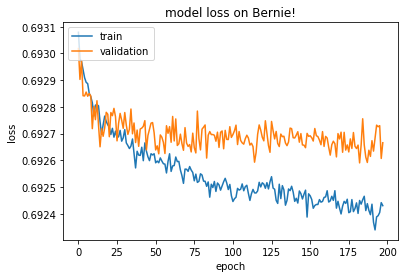

In [9]:
plot(history)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers

model = Sequential([
    Dense(100, input_shape=(50,)),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Dense(1),
    Activation('sigmoid'),
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_crossentropy'])

history = model.fit(train_x, 
                    train_y, 
                    validation_data=(val_x,val_y), 
                    epochs=50, 
                    batch_size=2048, 
                    shuffle=False)

plot(history)
#0.6925 best

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 15,301
Trainable params: 15,301
Non-trainable params: 0
_________________________________________________________________
Train 

KeyboardInterrupt: 

numerai_datasets.zip: 116MB [01:00, 3.01MB/s]                                                                                              

In [61]:
from more_itertools import *
from pipe import *
import math

In [11]:
@Pipe
def as_npy(l):
    yield np.array(list(l))

In [73]:
def getX(signals,step=5,window_size=20): 
    x = windowed( range(signals.shape[0]), window_size, step=step) \
    | select( lambda x: x | select(lambda y: signals[y]) | as_npy ) \
    | take((signals.shape[0]/step)-window_size) \
    | as_npy
    return x.reshape( x.shape + (1,) )

In [59]:
def getY(labels,step=5,window_size=20):
    return labels[window_size:math.ceil((((labels.shape[0]/step)-window_size)+window_size))]

In [74]:
X = getX(train_x)
Y = getY(train_y)

In [83]:
X_val = getX(val_x)
Y_val = getY(val_y)

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D,Flatten,MaxPooling2D,SpatialDropout2D
from keras import regularizers

# cnn idea
model = Sequential([
    Conv2D(50, kernel_size=(3,1),input_shape=(20,50,1)),
    Activation('relu'),
    SpatialDropout2D(0.1),
    Conv2D(50, kernel_size=(3,1)),
    Activation('relu'),
    SpatialDropout2D(0.1),
    Conv2D(10, kernel_size=(3,1)),
    Activation('relu'),
    SpatialDropout2D(0.1),
    Conv2D(5, kernel_size=(3,1)),
    Activation('relu'),
    SpatialDropout2D(0.1),
    Flatten(),
    Dropout(0.4),
    Dense(100),
    Dropout(0.4),
    Dense(100),
    Dropout(0.4),
    Dense(100),
    Dropout(0.4),
    Dense(100),    
    Dense(1),
    Activation('sigmoid'),
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_crossentropy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 18, 50, 50)        200       
_________________________________________________________________
activation_47 (Activation)   (None, 18, 50, 50)        0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 18, 50, 50)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 50, 50)        7550      
_________________________________________________________________
activation_48 (Activation)   (None, 16, 50, 50)        0         
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 16, 50, 50)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 50, 10)        1510      
__________

In [ ]:
history = model.fit(X, 
                    Y, 
                    epochs=50, 
                    batch_size=6000, 
                    shuffle=False,
                    validation_data=(X_val, Y_val))

plot(history)
#0.6925 best

Train on 78703 samples, validate on 9253 samples
Epoch 1/50
78703/78703 [==============================] - ETA: 38s - loss: 0.6977 - binary_crossentropy: 0.69 - ETA: 18s - loss: 0.6993 - binary_crossentropy: 0.69 - ETA: 12s - loss: 0.6975 - binary_crossentropy: 0.69 - ETA: 8s - loss: 0.6967 - binary_crossentropy: 0.6967 - ETA: 6s - loss: 0.6962 - binary_crossentropy: 0.696 - ETA: 4s - loss: 0.6957 - binary_crossentropy: 0.695 - ETA: 3s - loss: 0.6954 - binary_crossentropy: 0.695 - ETA: 2s - loss: 0.6951 - binary_crossentropy: 0.695 - ETA: 2s - loss: 0.6949 - binary_crossentropy: 0.694 - ETA: 1s - loss: 0.6947 - binary_crossentropy: 0.694 - ETA: 0s - loss: 0.6946 - binary_crossentropy: 0.694 - ETA: 0s - loss: 0.6945 - binary_crossentropy: 0.694 - ETA: 0s - loss: 0.6944 - binary_crossentropy: 0.694 - 6s 81us/step - loss: 0.6944 - binary_crossentropy: 0.6944 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 2/50
78703/78703 [==============================] - ETA: 2s - loss: 0.693

78703/78703 [==============================] - ETA: 2s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 2s - loss: 0.6931 - binary_crossentropy: 0.693 - ETA: 1s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 1s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 1s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 1s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 1s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - 3s 33us/step - loss: 0.6932 - binary_crossentropy: 0.6932 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 20/50
78703/78703 [==============================] - ETA: 2s - loss: 0.6931 - binary_crossentropy: 0.693 - ETA: 2s - loss: 0.6932 - bi

In [6]:
# we will use logistic regression; you will want to write your own model
model = nx.logistic()

# fit model with train data and make predictions for tournament data
prediction = nx.production(model, data, tournament='bernie')

# save predictions to csv file
prediction.to_csv('logistic.csv', verbose=True)

# upload predictions to Numerai to enter the tournament
# create the public_id and secret_key on the Numerai website
#
# nx.upload('logistic.csv', tournament='bernie', public_id, secret_key)



logistic(inverse_l2=0.0001)
       logloss     auc     acc    ystd   stats            
mean  0.692808  0.5194  0.5142  0.0063   tourn      bernie
std   0.000375  0.0168  0.0137  0.0001  region  validation
min   0.691961  0.4903  0.4925  0.0062    eras          12
max   0.693460  0.5553  0.5342  0.0064  consis        0.75
Done in 0.06 minutes
Save logistic.csv


In [13]:
def gen(cols, batch_size, X, y, lookback = 10, step = 1, shuffle = True):
    np.random.seed(42)
    lookback = min(len(X), lookback)
    i = lookback
    lookback_idx = np.arange(0, lookback)

    while True:
        if shuffle:
            rows = np.random.randint(lookback, len(X), size = batch_size)
        else:
            rows = list(range(i, min(len(X), i + batch_size)))
            if i + batch_size >= len(X):
                n_missing = (i + batch_size) - len(X)
                rows += list(range(lookback, lookback + n_missing))
                i = lookback + n_missing
            else:
                i += batch_size
        
        if lookback:
            batch = np.zeros((batch_size, lookback // step, len(cols)))
        else: 
            batch = np.zeros((batch_size, len(cols)))
        target = np.zeros((batch_size, ))
        # Fill up the output matrices
        for idx, x in enumerate(rows):
            if not lookback:
                batch[current] = df[cols].iloc[x]
            else:
                batch[idx] = X[cols].iloc[x - lookback_idx]
            target[idx] = y.iloc[x]
        
        yield batch, target

In [9]:
from keras import layers


c1d = Sequential()
c1d.add(layers.Conv1D(32, 5, padding="same", activation='relu',
                        input_shape=(None, len(cols))))
c1d.add(layers.MaxPooling1D(3))
#c1d.add(layers.Dropout(0.5))
c1d.add(layers.Conv1D(32, 9, padding="same", activation='relu'))
c1d.add(layers.MaxPooling1D(3))
#c1d.add(layers.Dropout(0.5))
c1d.add(layers.Conv1D(32, 5, padding="same", activation='relu'))
c1d.add(layers.GlobalMaxPooling1D())
c1d.add(layers.Dense(1, activation="sigmoid"))

c1d.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
c1d.summary()


NameError: name 'cols' is not defined

In [ ]:
train_gen =  gen(cols, batch_size, train, train["target_elizabeth"], lookback)

val_gen =  gen(cols, batch_size, validation, validation["target_elizabeth"], lookback)
test_gen =  gen(cols, 1000, validation, validation["target_elizabeth"], lookback)
